# DATA606 Capstone Project
## Predictive EMR Analysis (EDA)

### Part-1, Exploring 'admissions.csv'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ADMISSIONS.csv')

In [3]:
data

ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0          21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1          22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2          23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3          24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4          25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   
...       ...         ...      ...                  ...                  ...   
58971   58594       98800   191113  2131-03-30 21:13:00  2131-04-02 15:02:00   
58972   58595       98802   101071  2151-03-05 20:00:00  2151-03-06 09:10:00   
58973   58596       98805   122631  2200-09-12 07:15:00  2200-09-20 12:08:00   
58974   58597       98813   170407  2128-11-11 02:29:00  2128-12-22 13:11:00   
58975   58598       98813   190264  2131-10-25 03:09:00  2131-10-26 17:44:00   

                 DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0                      NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1                      NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2                      NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3                      NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4                      NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
...                    ...            ...                        ...   
58971                  NaN      EMERGENCY  CLINIC REFERRAL/PREMATURE   
58972  2151-03-06 09:10:00      EMERGENCY  CLINIC REFERRAL/PREMATURE   
58973                  NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
58974                  NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
58975                  NaN      EMERGENCY  CLINIC REFERRAL/PREMATURE   

              DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION  \
0      DISC-TRAN CANCER/CHLDRN H   Private      NaN       UNOBTAINABLE   
1               HOME HEALTH CARE  Medicare      NaN           CATHOLIC   
2               HOME HEALTH CARE  Medicare     ENGL           CATHOLIC   
3                           HOME   Private      NaN  PROTESTANT QUAKER   
4                           HOME   Private      NaN       UNOBTAINABLE   
...                          ...       ...      ...                ...   
58971                       HOME   Private     ENGL      NOT SPECIFIED   
58972               DEAD/EXPIRED  Medicare     ENGL           CATHOLIC   
58973           HOME HEALTH CARE   Private     ENGL      NOT SPECIFIED   
58974                        SNF   Private     ENGL           CATHOLIC   
58975                       HOME   Private     ENGL           CATHOLIC   

      MARITAL_STATUS ETHNICITY            EDREGTIME            EDOUTTIME  \
0            MARRIED     WHITE  2196-04-09 10:06:00  2196-04-09 13:24:00   
1            MARRIED     WHITE                  NaN                  NaN   
2            MARRIED     WHITE                  NaN                  NaN   
3             SINGLE     WHITE                  NaN                  NaN   
4            MARRIED     WHITE  2160-11-02 01:01:00  2160-11-02 04:27:00   
...              ...       ...                  ...                  ...   
58971         SINGLE     WHITE  2131-03-30 19:44:00  2131-03-30 22:41:00   
58972        WIDOWED     WHITE  2151-03-05 17:23:00  2151-03-05 21:06:00   
58973        MARRIED     WHITE                  NaN                  NaN   
58974        MARRIED     WHITE  2128-11-10 23:48:00  2128-11-11 03:16:00   
58975        MARRIED     WHITE  2131-10-25 00:08:00  2131-10-25 04:35:00   

                                               DIAGNOSIS  \
0                                BENZODIAZEPINE OVERDOSE   
1      CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...   
2                                             BRAIN MASS   
3                         INTERIOR MYOCARDIAL INFARCTION   
4                                ACUTE CORONARY SYNDROME   
...                

In [4]:
data.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [5]:
data['DIAGNOSIS'].unique()

array(['BENZODIAZEPINE OVERDOSE',
       'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT/SDA',
       'BRAIN MASS', ..., 'R/O METASTASIS',
       'GASTROPARESIS\\PLACEMENT OF G-TUBE **REMOTE WEST**/SDA',
       'JOINT EFFUSION'], dtype=object)

In [6]:
data.ADMITTIME = pd.to_datetime(data.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
data.DISCHTIME = pd.to_datetime(data.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
data.DEATHTIME = pd.to_datetime(data.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [7]:
data = data.sort_values(['SUBJECT_ID','ADMITTIME'])
data = data.reset_index(drop = True)

In [8]:
data.loc[data.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE']]

SUBJECT_ID           ADMITTIME ADMISSION_TYPE
165         124 2160-06-24 21:25:00      EMERGENCY
166         124 2161-12-17 03:39:00      EMERGENCY
167         124 2165-05-21 21:02:00       ELECTIVE
168         124 2165-12-31 18:55:00      EMERGENCY

In [9]:
data['NEXT_ADMITTIME'] = data.groupby('SUBJECT_ID').ADMITTIME.shift(-1)
data['NEXT_ADMISSION_TYPE'] = data.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)

In [10]:
data.loc[data.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']]

SUBJECT_ID           ADMITTIME ADMISSION_TYPE      NEXT_ADMITTIME  \
165         124 2160-06-24 21:25:00      EMERGENCY 2161-12-17 03:39:00   
166         124 2161-12-17 03:39:00      EMERGENCY 2165-05-21 21:02:00   
167         124 2165-05-21 21:02:00       ELECTIVE 2165-12-31 18:55:00   
168         124 2165-12-31 18:55:00      EMERGENCY                 NaT   

    NEXT_ADMISSION_TYPE  
165           EMERGENCY  
166            ELECTIVE  
167           EMERGENCY  
168                 NaN

In [11]:
rows = data.NEXT_ADMISSION_TYPE == 'ELECTIVE'
data.loc[rows,'NEXT_ADMITTIME'] = pd.NaT
data.loc[rows,'NEXT_ADMISSION_TYPE'] = np.NaN

In [12]:
data.loc[data.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']]

SUBJECT_ID           ADMITTIME ADMISSION_TYPE      NEXT_ADMITTIME  \
165         124 2160-06-24 21:25:00      EMERGENCY 2161-12-17 03:39:00   
166         124 2161-12-17 03:39:00      EMERGENCY                 NaT   
167         124 2165-05-21 21:02:00       ELECTIVE 2165-12-31 18:55:00   
168         124 2165-12-31 18:55:00      EMERGENCY                 NaT   

    NEXT_ADMISSION_TYPE  
165           EMERGENCY  
166                 NaN  
167           EMERGENCY  
168                 NaN

In [13]:
data = data.sort_values(['SUBJECT_ID','ADMITTIME'])
data[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = data.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method = 'bfill')

In [14]:
data.loc[data.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']]

SUBJECT_ID           ADMITTIME ADMISSION_TYPE      NEXT_ADMITTIME  \
165         124 2160-06-24 21:25:00      EMERGENCY 2161-12-17 03:39:00   
166         124 2161-12-17 03:39:00      EMERGENCY 2165-12-31 18:55:00   
167         124 2165-05-21 21:02:00       ELECTIVE 2165-12-31 18:55:00   
168         124 2165-12-31 18:55:00      EMERGENCY                 NaT   

    NEXT_ADMISSION_TYPE  
165           EMERGENCY  
166           EMERGENCY  
167           EMERGENCY  
168                 NaN

In [15]:
data['DAYS_NEXT_ADMIT']=  (data.NEXT_ADMITTIME - data.DISCHTIME).dt.total_seconds()/(24*60*60)

In [16]:
data.head(5)

ROW_ID  SUBJECT_ID  HADM_ID           ADMITTIME           DISCHTIME  \
0       1           2   163353 2138-07-17 19:04:00 2138-07-21 15:48:00   
1       2           3   145834 2101-10-20 19:08:00 2101-10-31 13:58:00   
2       3           4   185777 2191-03-16 00:28:00 2191-03-23 18:41:00   
3       4           5   178980 2103-02-02 04:31:00 2103-02-04 12:15:00   
4       5           6   107064 2175-05-30 07:15:00 2175-06-15 16:00:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaT        NEWBORN  PHYS REFERRAL/NORMAL DELI   
1       NaT      EMERGENCY       EMERGENCY ROOM ADMIT   
2       NaT      EMERGENCY       EMERGENCY ROOM ADMIT   
3       NaT        NEWBORN  PHYS REFERRAL/NORMAL DELI   
4       NaT       ELECTIVE  PHYS REFERRAL/NORMAL DELI   

          DISCHARGE_LOCATION INSURANCE  ... MARITAL_STATUS ETHNICITY  \
0                       HOME   Private  ...            NaN     ASIAN   
1                        SNF  Medicare  ...        MARRIED     WHITE   
2  HOME WITH HOME IV PROVIDR   Private  ...         SINGLE     WHITE   
3                       HOME   Private  ...            NaN     ASIAN   
4           HOME HEALTH CARE  Medicare  ...        MARRIED     WHITE   

             EDREGTIME            EDOUTTIME  \
0                  NaN                  NaN   
1  2101-10-20 17:09:00  2101-10-20 19:24:00   
2  2191-03-15 13:10:00  2191-03-16 01:10:00   
3                  NaN                  NaN   
4                  NaN                  NaN   

                             DIAGNOSIS HOSPITAL_EXPIRE_FLAG  \
0                              NEWBORN                    0   
1                          HYPOTENSION                    0   
2  FEVER,DEHYDRATION,FAILURE TO THRIVE                    0   
3                              NEWBORN                    0   
4            CHRONIC RENAL FAILURE/SDA                    0   

  HAS_CHARTEVENTS_DATA  NEXT_ADMITTIME  NEXT_ADMISSION_TYPE DAYS_NEXT_ADMIT  
0                    1             NaT                  NaN             NaN  
1                    1             NaT                  NaN             NaN  
2                    1             NaT                  NaN             NaN  
3                    1             NaT                  NaN             NaN  
4                    1             NaT                  NaN             NaN  

[5 rows x 22 columns]

In [17]:
data['DAYS_NEXT_ADMIT']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
58971   NaN
58972   NaN
58973   NaN
58974   NaN
58975   NaN
Name: DAYS_NEXT_ADMIT, Length: 58976, dtype: float64

In [18]:
data.loc[~data.DAYS_NEXT_ADMIT.isnull(),'DAYS_NEXT_ADMIT']

13        128.920833
18        128.190972
21       1501.016667
32       1678.557639
35          4.242361
            ...     
58920       7.391667
58943     330.138889
58951      72.883333
58967      28.154167
58968      35.188194
Name: DAYS_NEXT_ADMIT, Length: 11399, dtype: float64

In [26]:
df=data.dropna(subset=['DAYS_NEXT_ADMIT'])
df

ROW_ID  SUBJECT_ID  HADM_ID           ADMITTIME           DISCHTIME  \
13         14          17   194023 2134-12-27 07:15:00 2134-12-31 16:05:00   
18         19          21   109451 2134-09-11 12:17:00 2134-09-24 16:15:00   
21         22          23   152223 2153-09-03 07:15:00 2153-09-08 19:10:00   
32         33          34   115799 2186-07-18 16:46:00 2186-07-20 16:00:00   
35         36          36   182104 2131-04-30 07:15:00 2131-05-08 14:00:00   
...       ...         ...      ...                 ...                 ...   
58920   58921       99822   163117 2197-06-16 03:01:00 2197-06-25 17:00:00   
58943   58944       99897   162913 2181-08-06 02:22:00 2181-08-07 16:30:00   
58951   58952       99923   164914 2201-02-23 20:42:00 2201-03-03 16:00:00   
58967   58968       99982   151454 2156-11-28 11:56:00 2156-12-08 13:45:00   
58968   58969       99982   112748 2157-01-05 17:27:00 2157-01-12 13:00:00   

      DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
13          NaT       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
18          NaT      EMERGENCY       EMERGENCY ROOM ADMIT   
21          NaT       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
32          NaT      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
35          NaT      EMERGENCY  CLINIC REFERRAL/PREMATURE   
...         ...            ...                        ...   
58920       NaT      EMERGENCY       EMERGENCY ROOM ADMIT   
58943       NaT      EMERGENCY  CLINIC REFERRAL/PREMATURE   
58951       NaT      EMERGENCY  CLINIC REFERRAL/PREMATURE   
58967       NaT      EMERGENCY  PHYS REFERRAL/NORMAL DELI   
58968       NaT      EMERGENCY  CLINIC REFERRAL/PREMATURE   

             DISCHARGE_LOCATION INSURANCE  ... MARITAL_STATUS      ETHNICITY  \
13             HOME HEALTH CARE   Private  ...        MARRIED          WHITE   
18     REHAB/DISTINCT PART HOSP  Medicare  ...        MARRIED          WHITE   
21             HOME HEALTH CARE  Medicare  ...        MARRIED          WHITE   
32                         HOME  Medicare  ...        MARRIED          WHITE   
35             HOME HEALTH CARE  Medicare  ...        MARRIED          WHITE   
...                         ...       ...  ...            ...            ...   
58920                      HOME   Private  ...        MARRIED          WHITE   
58943                      HOME   Private  ...        MARRIED  BLACK/HAITIAN   
58951                      HOME   Private  ...        MARRIED          WHITE   
58967          HOME HEALTH CARE  Medicare  ...        MARRIED          WHITE   
58968                      HOME  Medicare  ...        MARRIED          WHITE   

                 EDREGTIME            EDOUTTIME  \
13                     NaN                  NaN   
18     2134-09-11 09:22:00  2134-09-11 22:30:00   
21                     NaN                  NaN   
32                     NaN                  NaN   
35                     NaN                  NaN   
...                    ...                  ...   
58920  2197-06-15 23:33:00  2197-06-16 05:14:00   
58943  2181-08-05 22:31:00  2181-08-06 04:13:00   
58951  2201-02-23 15:54:00  2201-02-23 21:58:00   
58967                  NaN                  NaN   
58968  2157-01-05 14:03:00  2157-01-05 18:50:00   

                                               DIAGNOSIS HOSPITAL_EXPIRE_FLAG  \
13     PATIENT FORAMEN OVALE\ PATENT FORAMEN OVALE MI...                    0   
18                              CONGESTIVE HEART FAILURE                    0   
21     CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...                    0   
32                                       CHEST PAIN\CATH                    0   
35     CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...                    0   
...                                                  ...                  ...   
58920                                       HYPONATREMIA                    0   
58943                                      HYPERGLYCEMIA                    0   
58951                             

In [19]:
admissions = data['ADMISSION_TYPE'].value_counts()

In [20]:
admissions

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64

In [27]:
re_admissions = df['ADMISSION_TYPE'].value_counts()

Text(0.5, 1.0, 'Readmitted paitients Admission Types')

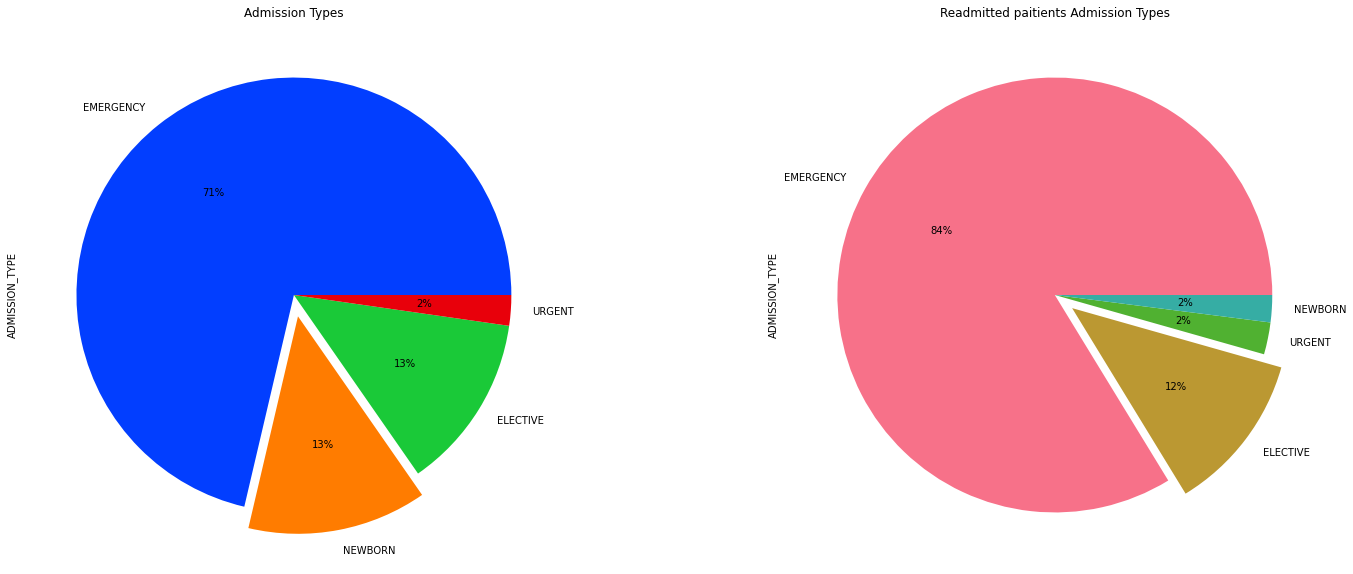

In [29]:
fig,ax=plt.subplots(1,2,figsize=(25,10))
plt.subplot(1,2,1)
explode = [0, 0.1, 0, 0]
palette_color = sns.color_palette('bright')
ax = admissions.plot(kind='pie',colors=palette_color,explode=explode,autopct='%1.0f%%')
ax.set_title("Admission Types")
plt.subplot(1,2,2)
explode = [0, 0.1, 0, 0]
palette_color = sns.color_palette('husl')
ax = re_admissions.plot(kind='pie',colors=palette_color,explode=explode,autopct='%1.0f%%')
ax.set_title("Readmitted Patient's Admission Types)

Text(0.5, 1.0, 'Count of patient who readmitted within a Year')

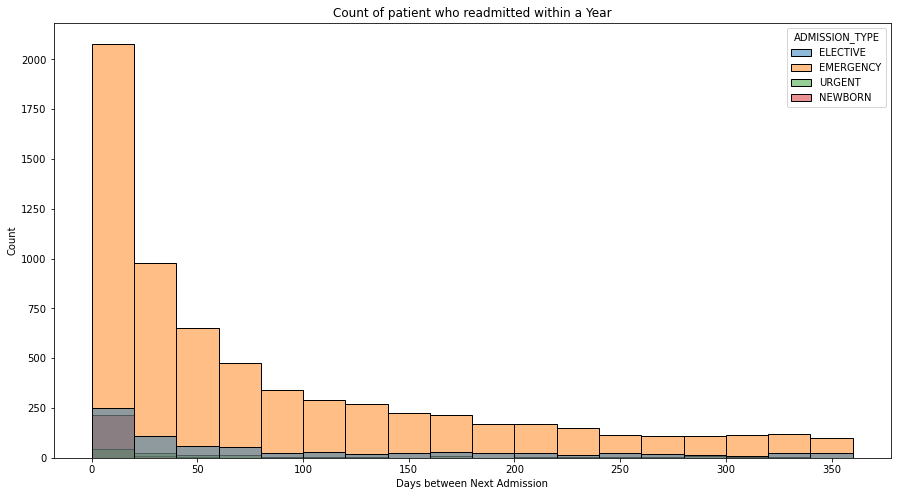

In [32]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=df, x="DAYS_NEXT_ADMIT", hue="ADMISSION_TYPE", multiple="layer",bins =range(0,365,20))
plt.xlabel('Days between Next Admission')
plt.title('Count of patient who readmitted within a Year')

Text(0.5, 1.0, 'Count Plot of Insurance Holder Patient Types by Admission Type')

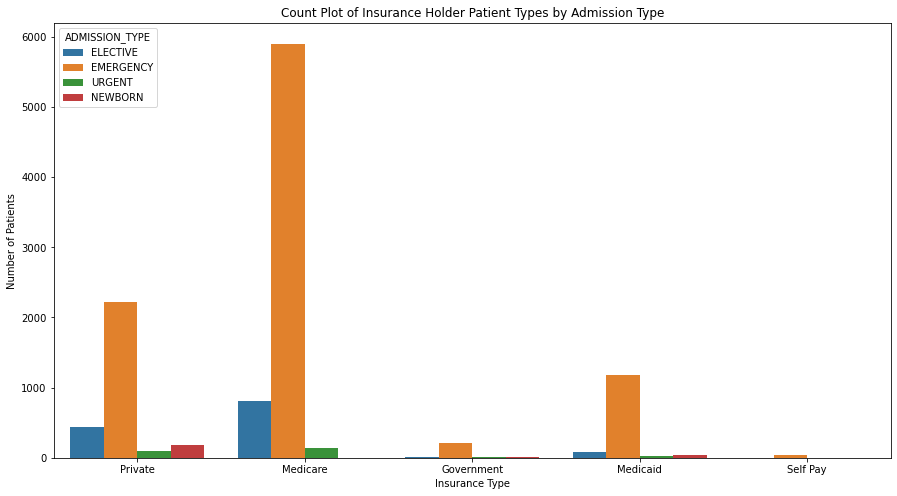

In [33]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df, x="INSURANCE", hue = 'ADMISSION_TYPE')
plt.xlabel('Insurance Type')
plt.ylabel('Number of Patients')
plt.title('Count Plot of Insurance Holder Patient Types by Admission Type')

In [24]:
Diagnos_count = df['DIAGNOSIS'].value_counts()

In [25]:
q1 = Diagnos_count.quantile(0.99)

In [26]:
filtered_df = df[df['DIAGNOSIS'].isin(Diagnos_count[Diagnos_count > q1].index)]

Text(0.5, 1.0, 'Most Common Diseases')

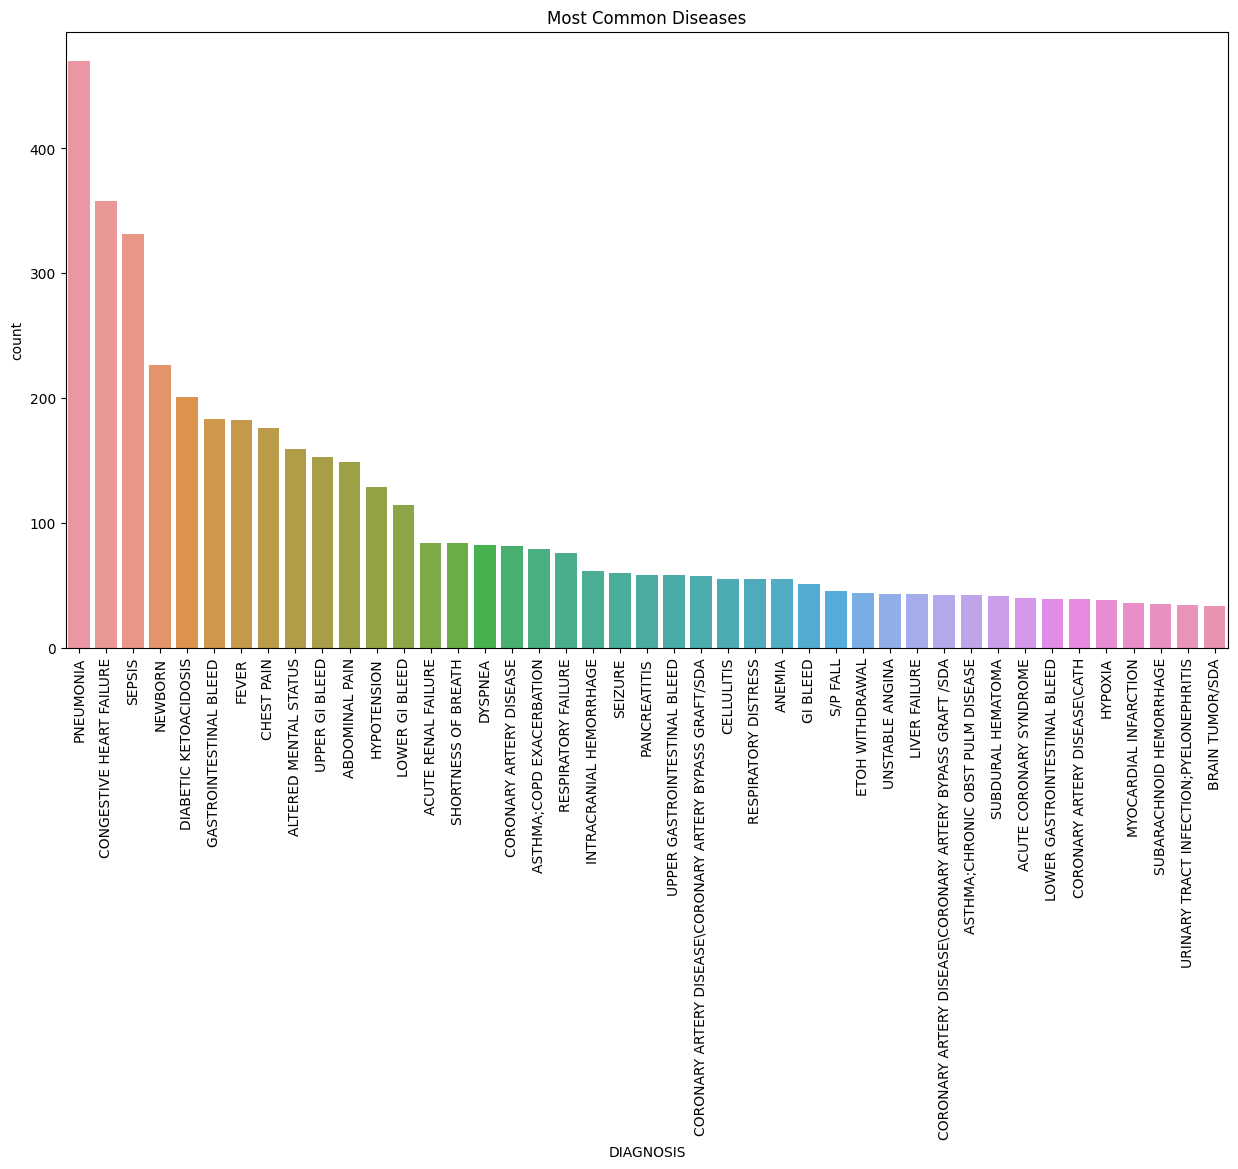

In [30]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='DIAGNOSIS', data=filtered_df, order = filtered_df['DIAGNOSIS'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set_title("Most Common Diseases")

### Part-2, Exploring 'noteevents.csv'

In [2]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import pandas as pd
import numpy as np

In [33]:
filtered_df

ROW_ID  SUBJECT_ID  HADM_ID           ADMITTIME           DISCHTIME  \
18         19          21   109451 2134-09-11 12:17:00 2134-09-24 16:15:00   
21         22          23   152223 2153-09-03 07:15:00 2153-09-08 19:10:00   
35         36          36   182104 2131-04-30 07:15:00 2131-05-08 14:00:00   
68         69          68   170467 2173-12-15 16:16:00 2174-01-03 18:30:00   
95         96          94   183686 2176-02-25 16:49:00 2176-02-29 17:45:00   
...       ...         ...      ...                 ...                 ...   
58850   58851       99562   129689 2183-02-02 15:13:00 2183-02-18 13:28:00   
58868   58869       99647   192055 2147-11-24 14:17:00 2147-12-01 16:45:00   
58875   58876       99660   168541 2142-04-25 12:04:00 2142-04-29 18:00:00   
58895   58896       99756   154665 2191-06-15 17:53:00 2191-07-06 17:55:00   
58968   58969       99982   112748 2157-01-05 17:27:00 2157-01-12 13:00:00   

      DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
18          NaT      EMERGENCY       EMERGENCY ROOM ADMIT   
21          NaT       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
35          NaT      EMERGENCY  CLINIC REFERRAL/PREMATURE   
68          NaT      EMERGENCY       EMERGENCY ROOM ADMIT   
95          NaT      EMERGENCY       EMERGENCY ROOM ADMIT   
...         ...            ...                        ...   
58850       NaT         URGENT  TRANSFER FROM HOSP/EXTRAM   
58868       NaT      EMERGENCY       EMERGENCY ROOM ADMIT   
58875       NaT      EMERGENCY       EMERGENCY ROOM ADMIT   
58895       NaT      EMERGENCY  CLINIC REFERRAL/PREMATURE   
58968       NaT      EMERGENCY  CLINIC REFERRAL/PREMATURE   

             DISCHARGE_LOCATION INSURANCE  ... MARITAL_STATUS  \
18     REHAB/DISTINCT PART HOSP  Medicare  ...        MARRIED   
21             HOME HEALTH CARE  Medicare  ...        MARRIED   
35             HOME HEALTH CARE  Medicare  ...        MARRIED   
68             HOME HEALTH CARE  Medicare  ...         SINGLE   
95             HOME HEALTH CARE  Medicare  ...        MARRIED   
...                         ...       ...  ...            ...   
58850                       SNF  Medicare  ...        MARRIED   
58868                      HOME   Private  ...         SINGLE   
58875          HOME HEALTH CARE  Medicare  ...        MARRIED   
58895   LONG TERM CARE HOSPITAL  Medicaid  ...         SINGLE   
58968                      HOME  Medicare  ...        MARRIED   

                       ETHNICITY            EDREGTIME            EDOUTTIME  \
18                         WHITE  2134-09-11 09:22:00  2134-09-11 22:30:00   
21                         WHITE                  NaN                  NaN   
35                         WHITE                  NaN                  NaN   
68        BLACK/AFRICAN AMERICAN  2173-12-15 11:41:00  2173-12-15 17:52:00   
95                         ASIAN  2176-02-25 10:35:00  2176-02-25 18:14:00   
...                          ...                  ...                  ...   
58850                      WHITE                  NaN                  NaN   
58868  HISPANIC/LATINO - MEXICAN  2147-11-24 10:54:00  2147-11-24 15:49:00   
58875                      WHITE  2142-04-25 09:07:00  2142-04-25 16:44:00   
58895                      WHITE  2191-06-15 12:32:00  2191-06-15 19:01:00   
58968                      WHITE  2157-01-05 14:03:00  2157-01-05 18:50:00   

                                               DIAGNOSIS HOSPITAL_EXPIRE_FLAG  \
18                              CONGESTIVE HEART FAILURE                    0   
21     CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...                    0   
35     CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...                    0   
68                                             PNEUMONIA                    0   
95                                                SEPSIS                    0   
...                                                  ...                  ...   
58850                             GASTROINTESTINAL B

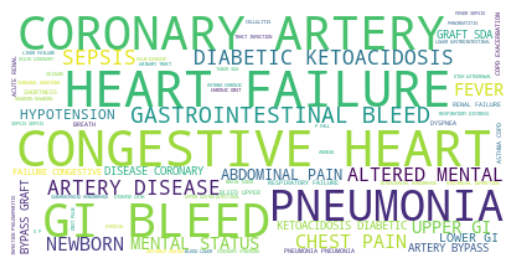

In [37]:
text = " ".join(i for i in filtered_df.DIAGNOSIS)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
usa_mask = np.array(Image.open('usa_shape_2.jpg'))

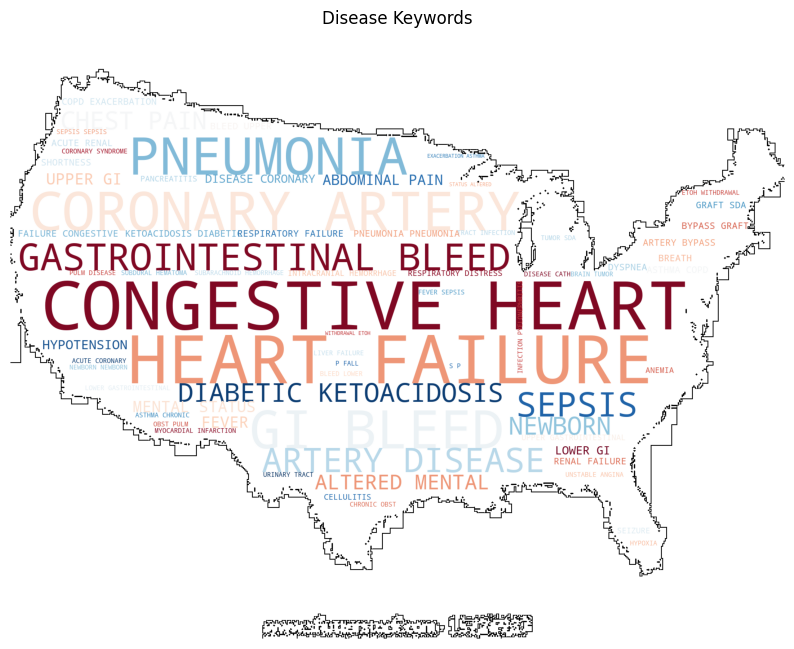

In [51]:
def generate_better_wordcloud(data, title, mask=None):
    cloud = WordCloud(scale=3,
                      max_words=150,
                      colormap='RdBu',
                      mask=mask,
                      background_color='white',
                      stopwords=stopwords,
                      collocations=True,
                      contour_color='black',
                      contour_width=0.5).generate(text)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
generate_better_wordcloud(text, 'Disease Keywords', mask=usa_mask)

In [4]:
df2 = pd.read_csv('NOTEEVENTS.csv')

C:\Users\Suhet\AppData\Local\Temp\ipykernel_17188\1773337558.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('NOTEEVENTS.csv')


In [5]:
df2.head()

ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaN       NaN   
1     175       13702  107527.0  2118-06-14       NaN       NaN   
2     176       13702  167118.0  2119-05-25       NaN       NaN   
3     177       13702  196489.0  2124-08-18       NaN       NaN   
4     178       26880  135453.0  2162-03-25       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   
2  Discharge summary      Report   NaN      NaN   
3  Discharge summary      Report   NaN      NaN   
4  Discharge summary      Report   NaN      NaN   

                                                TEXT  
0  Admission Date:  [**2151-7-16**]       Dischar...  
1  Admission Date:  [**2118-6-2**]       Discharg...  
2  Admission Date:  [**2119-5-4**]              D...  
3  Admission Date:  [**2124-7-21**]              ...  
4  Admission Date:  [**2162-3-3**]              D...

In [6]:
df2.TEXT[1]

'Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-6-14**]\n\nDate of Birth:                    Sex:  F\n\nService:  MICU and then to [**Doctor Last Name **] Medicine\n\nHISTORY OF PRESENT ILLNESS:  This is an 81-year-old female\nwith a history of emphysema (not on home O2), who presents\nwith three days of shortness of breath thought by her primary\ncare doctor to be a COPD flare.  Two days prior to admission,\nshe was started on a prednisone taper and one day prior to\nadmission she required oxygen at home in order to maintain\noxygen saturation greater than 90%.  She has also been on\nlevofloxacin and nebulizers, and was not getting better, and\npresented to the [**Hospital1 18**] Emergency Room.\n\nIn the [**Hospital3 **] Emergency Room, her oxygen saturation was\n100% on CPAP.  She was not able to be weaned off of this\ndespite nebulizer treatment and Solu-Medrol 125 mg IV x2.\n\nReview of systems is negative for the following:  Fevers,\nchills, nausea, vomiting, nigh

In [7]:
df2.shape

(2083180, 11)

In [11]:
import re
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df

data_clean = clean_text(df2.head(20831), 'TEXT', 'text_clean')
data_clean.head()

C:\Users\Suhet\AppData\Local\Temp\ipykernel_17188\3227360964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_text_field_name] = df[text_field].str.lower()
C:\Users\Suhet\AppData\Local\Temp\ipykernel_17188\3227360964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
C:\Users\Suhet\AppData\Local\Temp\ipykernel_17188\3227360964.py:6: SettingWithCopy

ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaN       NaN   
1     175       13702  107527.0  2118-06-14       NaN       NaN   
2     176       13702  167118.0  2119-05-25       NaN       NaN   
3     177       13702  196489.0  2124-08-18       NaN       NaN   
4     178       26880  135453.0  2162-03-25       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   
2  Discharge summary      Report   NaN      NaN   
3  Discharge summary      Report   NaN      NaN   
4  Discharge summary      Report   NaN      NaN   

                                                TEXT  \
0  Admission Date:  [**2151-7-16**]       Dischar...   
1  Admission Date:  [**2118-6-2**]       Discharg...   
2  Admission Date:  [**2119-5-4**]              D...   
3  Admission Date:  [**2124-7-21**]              ...   
4  Admission Date:  [**2162-3-3**]              D...   

                                          text_clean  
0  admission date         discharge date  service...  
1  admission date         discharge date  date of...  
2  admission date                discharge date  ...  
3  admission date                discharge date  ...  
4  admission date                discharge date  ...

In [12]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suhet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Suhet\AppData\Local\Temp\ipykernel_17188\805955981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaN       NaN   
1     175       13702  107527.0  2118-06-14       NaN       NaN   
2     176       13702  167118.0  2119-05-25       NaN       NaN   
3     177       13702  196489.0  2124-08-18       NaN       NaN   
4     178       26880  135453.0  2162-03-25       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   
2  Discharge summary      Report   NaN      NaN   
3  Discharge summary      Report   NaN      NaN   
4  Discharge summary      Report   NaN      NaN   

                                                TEXT  \
0  Admission Date:  [**2151-7-16**]       Dischar...   
1  Admission Date:  [**2118-6-2**]       Discharg...   
2  Admission Date:  [**2119-5-4**]              D...   
3  Admission Date:  [**2124-7-21**]              ...   
4  Admission Date:  [**2162-3-3**]              D...   

                                          text_clean  
0  admission date discharge date serviceaddendumr...  
1  admission date discharge date date birth sex f...  
2  admission date discharge date service cardioth...  
3  admission date discharge date service medicine...  
4  admission date discharge date date birth sex m...

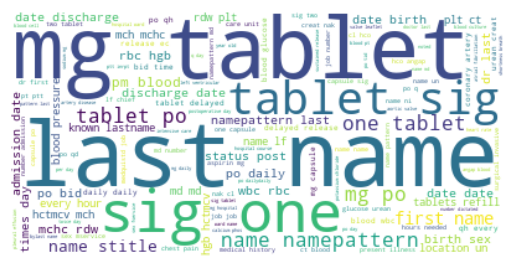

In [13]:
text = " ".join(i for i in data_clean.text_clean)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
usa_mask = np.array(Image.open('usa_shape_2.jpg'))

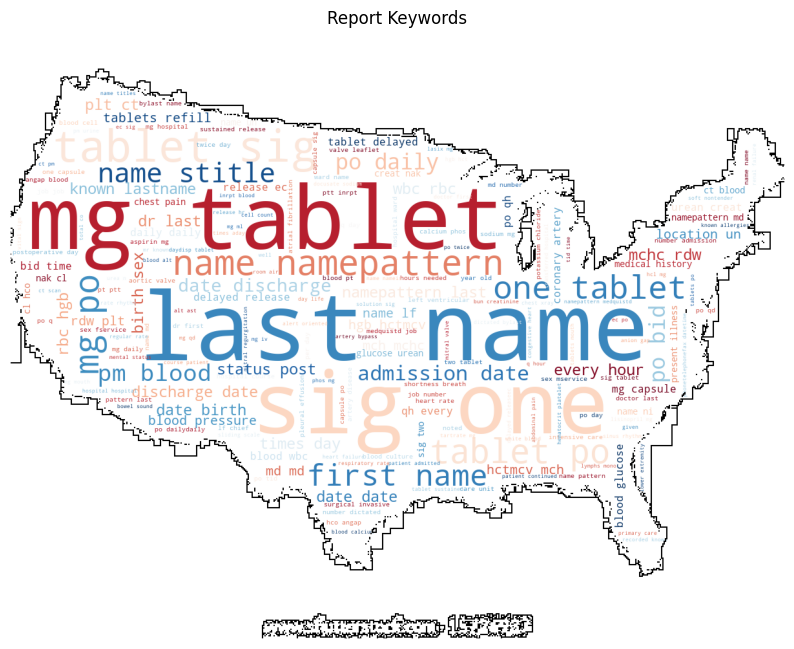

In [46]:
def generate_better_wordcloud(data, title, mask=None):
    cloud = WordCloud(scale=2,
                      max_words=200,
                      colormap='RdBu',
                      mask=mask,
                      background_color='white',
                      stopwords=stopwords,
                      collocations=True,
                      contour_color='black',
                      contour_width=0.5).generate(text)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
generate_better_wordcloud(text, 'Report Keywords', mask=usa_mask)

In [14]:
text_clean_list = [i for i in data_clean.text_clean]

In [15]:
text_clean_list

['admission date discharge date serviceaddendumradiologic studies radiologic studies also included chestct confirmed cavitary lesions left lung apexconsistent infectious processtuberculosis alsomoderatesized left pleural effusionhead ct head ct showed intracranial hemorrhage masseffect old infarction consistent past medicalhistoryabdominal ct abdominal ct showed lesions oft sacrum likely secondary osteoporosis canbe followed repeat imaging outpatient first name namepattern first name namepattern last name namepattern md md number dictated byhospital medquistd job job number',
 'admission date discharge date date birth sex fservice micu doctor last name medicinehistory present illness yearold femalewith history emphysema home presentswith three days shortness breath thought primarycare doctor copd flare two days prior admissionshe started prednisone taper one day prior toadmission required oxygen home order maintainoxygen saturation greater also onlevofloxacin nebulizers getting better 

In [20]:
list2 = []
for sent in text_clean_list:
    split_sent = sent.split(' ')
    for word in split_sent:
        list2.append(word)

In [36]:
frequent_words = pd.Series(list2).value_counts().head(20)

In [37]:
frequent_words

mg             251316
name           206441
patient        177949
po             166893
tablet         155032
blood          132842
one            106462
hospital       106454
sig            103309
day            100730
last            94458
left            77707
date            65698
right           63508
pm              63269
daily           62286
namepattern     62257
discharge       60000
history         57472
admission       56625
dtype: int64

<AxesSubplot: title={'center': 'Frequent Words'}>

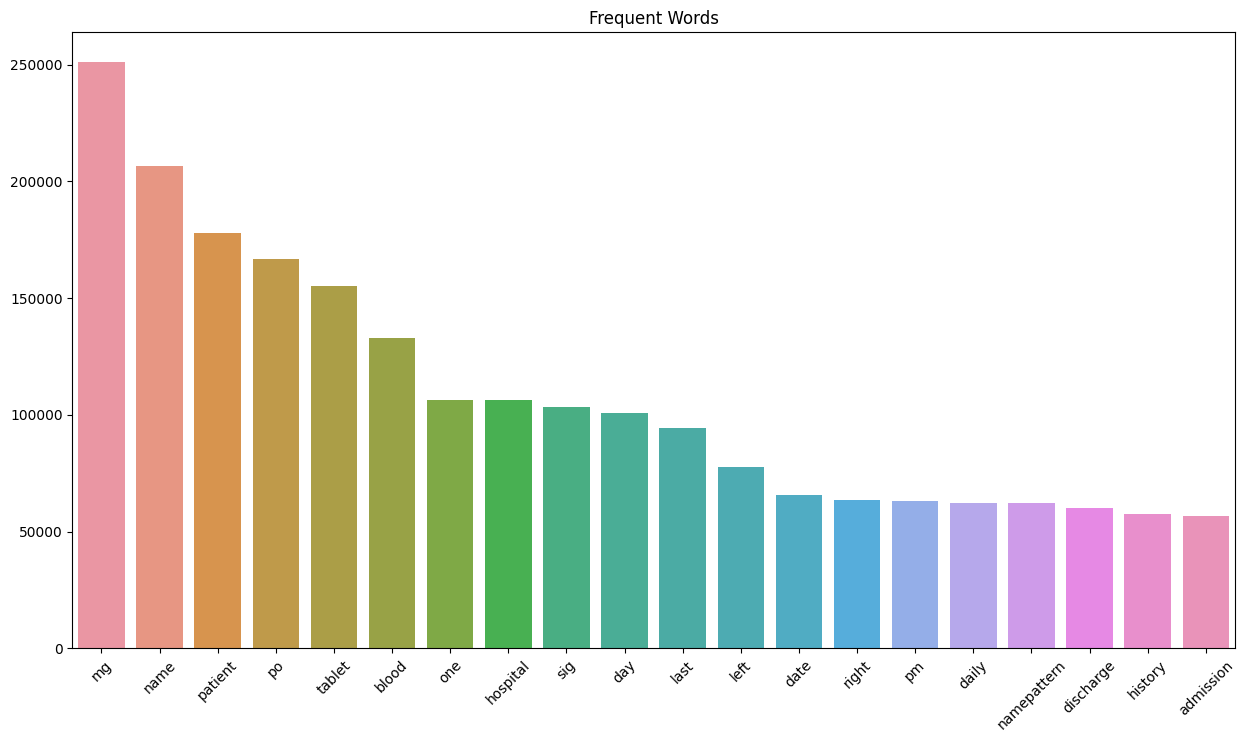

In [40]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.title('Frequent Words')
sns.barplot(x = frequent_words.index, y = frequent_words.values)

## Thank You!